# NuPlan Motion Data Analysis

## Brief Introduction to NuPlan Motion Dataset

NuPlan is the world's first large-scale planning benchmark for autonomous driving. The data is recorded over 4 cities - Boston, Pittsburgh, Singapore and Las Vegas. The nuPlan v1.0 dataset consists of over 15,000 logs and 1300+ hours of driving data. The nuPlan v1.1 dataset brings multiple improvements over the v1.0 dataset. Meanwhile, some log files are removed to guarantee the accuracy and reliability of the dataset.

NuPlan has its own toolkit package available at [nuplan-devkit](https://github.com/motional/nuplan-devkit/tree/master). This repository provides a data sample of nuPlan v1.1 including less than 1% of the original dataset. It also provides a visualized insight into the dataset. For those interested in the complete dataset, please follow this [link](https://www.nuscenes.org/nuplan#download)

### Structure of the Database File

![](../img/md/nuplan_schema.png)

In [1]:
import os
import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import sqlite3
import seaborn as sns

from utils import nuplan

data_path = "../trajectory/NuPlan/data/cache/"
trajectory_folders = ["train_boston", "train_pittsburgh", "train_singapore"]
trajectory_files = []
for folder in trajectory_folders:
    file_list = os.listdir(data_path + folder)
    trajectory_files.append(file_list)
    print(folder, len(file_list))

train_boston 1647
train_pittsburgh 1560
train_singapore 2396


### Trajectory Types in NuPlan

The dynamic objects recorded in NuPlan include

- `vehicle`: Includes all four or more wheeled vehicles, as well as trailers.
- `bicycle`: Includes bicycles, motorcycles and tricycles.
- `pedestrian`: All types of pedestrians, incl. strollers and wheelchairs.
- `generic object`: Animals, debris, pushable/pullable objects, permanent poles.

The static objects recorded in NuPlan include

- `traffic_cone`: Cones that are temporarily placed to control the flow of traffic.
- `barrier`: Solid barriers that can be either temporary or permanent.
- `czone_sign`: Temporary signs that indicate construction zones.

In [2]:
sample_db = sqlite3.connect(data_path + trajectory_folders[0] + "/" + trajectory_files[0][0])
df_category = pd.read_sql_query("SELECT * FROM category;", sample_db)
categories = {}
for row in df_category.iterrows():
    categories[row[1]["token"]] = row[1]["name"]
    print("%s: %s" % (row[1]["name"], row[1]["description"]))


vehicle: Includes all four or more wheeled vehicles, as well as trailers.
bicycle: Includes bicycles, motorcycles and tricycles.
pedestrian: All types of pedestrians, incl. strollers and wheelchairs.
traffic_cone: Cones that are temporarily placed to control the flow of traffic.
barrier: Solid barriers that can be either temporary or permanent.
czone_sign: Temporary signs that indicate construction zones.
generic_object: Animals, debris, pushable/pullable objects, permanent poles.


## Data Analysis

### Map and Trajectory Visualization



In [2]:
nuplan.plot_trajectories(data_path, trajectory_folders[0], trajectory_files[0])

: 

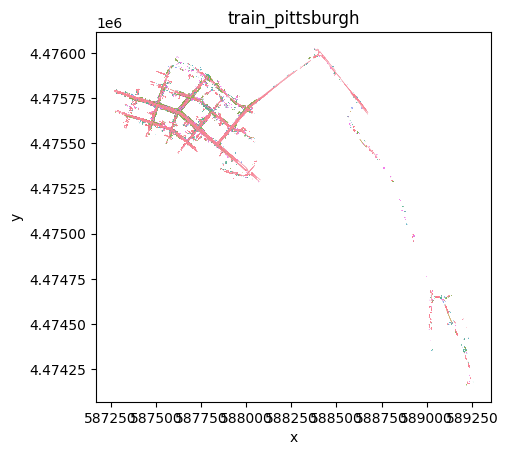

In [ ]:
nuplan.plot_trajectories(data_path, trajectory_folders[1], trajectory_files[1])

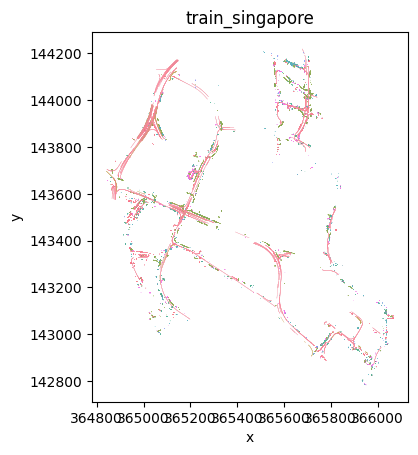

In [ ]:
nuplan.plot_trajectories(data_path, trajectory_folders[2], trajectory_files[2])

### Proportion of Trajectory Types

In this analysis, our focus is solely on examining the distribution of dynamic objects, namely, `vehicle`, `bicycle`, `pedestrian`, and `generic_object`. Due to the extensive volume of trajectory databases, we count the proportion based on location-level rather than file-level.

                 vehicle bicycle pedestrian generic_object
train_boston          62       1          6             10
train_pittsburgh      65       2          9             20
train_singapore       69       5         37             55
In train_boston, there are 62 vehicles, 1 bicycles, 6 pedestrians, 10 generic objects.
In train_pittsburgh, there are 65 vehicles, 2 bicycles, 9 pedestrians, 20 generic objects.
In train_singapore, there are 69 vehicles, 5 bicycles, 37 pedestrians, 55 generic objects.


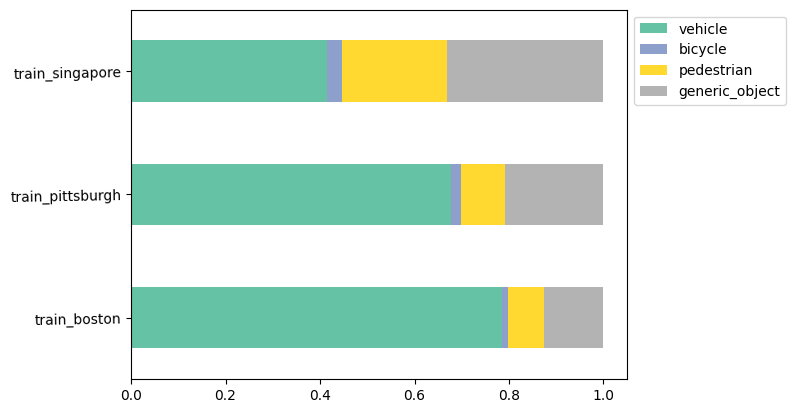

In [ ]:
nuplan.plot_class_proportion(data_path, trajectory_folders, trajectory_files)

### Speed Distribution



(array([   0,    0,    0, ..., 8999, 8999, 8999]), array([3545, 3882, 3883, ..., 3934, 6764, 6789]))


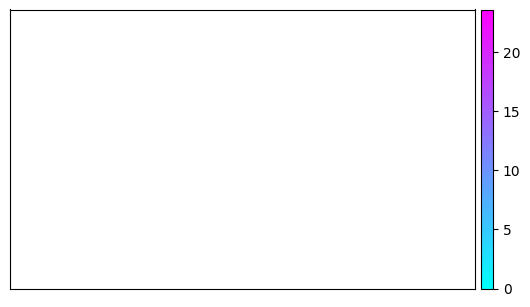

In [3]:
map_boundary_boston = [330500, 333500, 4689600, 4691400]
nuplan.plot_speed_distribution(map_boundary_boston, data_path, trajectory_folders[0], trajectory_files[0][:100])

In [3]:
map_boundary_pittsburgh = [587000, 589500, 4474000, 4476250]
nuplan.plot_speed_distribution(map_boundary_pittsburgh, data_path, trajectory_folders[1], trajectory_files[1][:10])

KeyboardInterrupt: 

                           token              lidar_pc_token  \
0     b'\xa3\xca(\xca\xf8@P\x9c'  b'\x89\x84\xac*&\x8b^\x0e'   
1       b'6k\x07X\x8d\x81\\\x07'  b'\x89\x84\xac*&\x8b^\x0e'   
2  b'\x80\x936\xe3\xff\x92T\xb0'  b'\x89\x84\xac*&\x8b^\x0e'   
3        b'L/\xaf\xf7\x82FT\xb2'  b'\x89\x84\xac*&\x8b^\x0e'   
4     b'\xc3i\xda\xcap\x15U\xb2'  b'\x89\x84\xac*&\x8b^\x0e'   

                     track_token               next_token prev_token  \
0                 b'qo-\xfd_XRV'  b';u]\x97\xdd\xa7[\xe5'       None   
1          b'J\x89ze\xd8\x08\\%'  b"\x16\xc4W\xa3\xfdXQ'"       None   
2     b'\x02\x98\xe7]\x90zR\x85'  b'v\xfb\xb17q\x91V\xe6'       None   
3  b'\xda\xb1\xd7\xca\xbdUX\x0f'  b'\xb9\xc3\xb8K>,Q\xa1'       None   
4    b'%\x8f\x96\xcf\xc9\rY\x1f'  b'\xf8]Y\xf4\xdf\xc2U1'       None   

               x             y          z     width    length    height  \
0  332659.199092  4.690052e+06 -22.898476  1.884728  4.411837  1.584448   
1  332687.458011  4.690042e+06 -

/tmp/ipykernel_20500/2848924108.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_traj.loc[0][2].hex())
/tmp/ipykernel_20500/2848924108.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df_traj, x="x", y="y", s=0.05, palette="husl")


<Axes: xlabel='x', ylabel='y'>

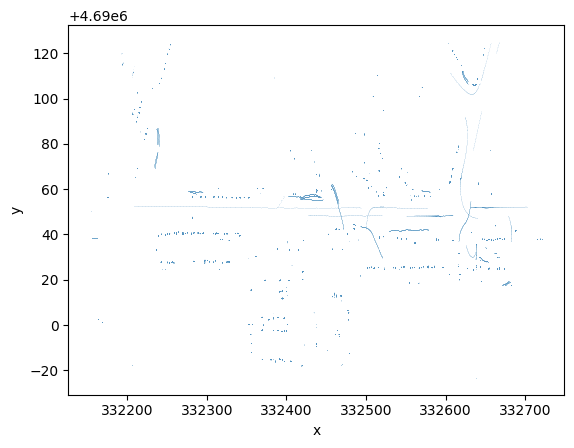

In [8]:
map_boundary_pittsburgh = [364700, 366200, 142700, 144400]
nuplan.plot_speed_distribution(map_boundary_pittsburgh, data_path, trajectory_folders[1], trajectory_files[1][:10])


In [16]:
df1 = pd.read_sql_query("SELECT * FROM ego_pose", trajectory_db)
print(df1.head())
print(len(df1))

                        token         timestamp              x             y  \
0        b'\xffr/\xba\x87=_G'  1629311955522463  332647.554630  4.690052e+06   
1  b'\xae\xcd\xd6\x0ea\x99].'  1629311955532833  332647.525242  4.690052e+06   
2           b'A\xbf?T7\xaa[g'  1629311955542356  332647.496723  4.690052e+06   
3  b'\x94t\x15\xf8L\xf6U\x1d'  1629311955552641  332647.466100  4.690052e+06   
4  b'\x846\x9a\x06\x17RW\xae'  1629311955562523  332647.439569  4.690052e+06   

           z        qw        qx        qy        qz        vx        vy  \
0 -23.126300  0.002100  0.008395  0.007255  0.999936  3.042895  0.035693   
1 -23.126259  0.002179  0.008370  0.007373  0.999935  3.034529  0.034076   
2 -23.126861  0.002161  0.008290  0.007466  0.999935  3.029368  0.033027   
3 -23.125604  0.002140  0.008246  0.007596  0.999935  3.021692  0.031157   
4 -23.126109  0.002168  0.008268  0.007750  0.999933  3.013242  0.029038   

         vz  acceleration_x  acceleration_y  acceleration_z  a

In [22]:
df2.loc[0][0].hex()

/tmp/ipykernel_27057/4044384778.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2.loc[0][0].hex()


'a3ca28caf840509c'